(210, 160, 3)
210
<class 'tuple'>


/root/anaconda3/envs/env1/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:357: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


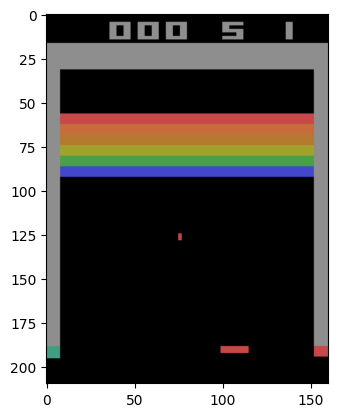

0
(0,)
<class 'tuple'>
Linear(in_features=1, out_features=1, bias=True)
Conv2d(0, 1, kernel_size=(1, 1), stride=(1, 1))


/root/anaconda3/envs/env1/lib/python3.9/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [45]:
import gymnasium as gym
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn.functional as F

env_name = 'ALE/Breakout-v5'
env = gym.make(env_name, render_mode="rgb_array")
_, _ = env.reset()
action = env.action_space.sample()
observation, reward, terminated, truncated, info = env.step(action)
print(env.observation_space.shape)
# print(env.render())
print(env.observation_space.shape[0])
# action_dim = env.action_space.shape[0]
o = env.action_space.shape
print(type(o))
plt.imshow(env.render())
plt.show()
o = np.array(o)
print(o.shape[0])
print(o.shape)
print(type(o.shape))
# layer = torch.nn.Con2d(4, 2, 1)
fc1 = torch.nn.Linear(1, 1)
print(fc1)

layer = torch.nn.Conv2d(o.shape[0], 1, 1)
print(layer)

In [46]:
class PolicyNet(torch.nn.Module):
    '''
    输入state维度的张量,输出action维度的张量,张量和为1
    '''
    def __init__(self, state_dim, hidden_dim, action_dim):
        super(PolicyNet, self).__init__()
        # self.fc1 = torch.nn.Linear(state_dim, hidden_dim) #todo 换成con2d
        # self.fc2 = torch.nn.Linear(hidden_dim, action_dim)
        self.fc1 = torch.nn.Conv2d(in_channels=state_dim, out_channels=hidden_dim, kernel_size=3)
        self.fc2 = torch.nn.Conv2d(hidden_dim, action_dim, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return F.softmax(self.fc2(x), dim=1)
    
net = PolicyNet(3, 4, 1)
s = torch.tensor(observation.swapaxes(0, 2), dtype=torch.float)
a = net(s)
print(observation.shape)
print(type(observation))
print(a)

(210, 160, 3)
<class 'numpy.ndarray'>
tensor([[[6.4103e-03, 5.4978e-03, 7.8600e-06,  ..., 6.4103e-03,
          6.4103e-03, 6.4103e-03],
         [6.4103e-03, 5.4978e-03, 7.8600e-06,  ..., 6.4103e-03,
          6.4103e-03, 6.4103e-03],
         [6.4103e-03, 5.4978e-03, 7.8600e-06,  ..., 6.4103e-03,
          6.4103e-03, 6.4103e-03],
         ...,
         [6.4103e-03, 5.4978e-03, 7.8600e-06,  ..., 6.4103e-03,
          6.4103e-03, 6.4103e-03],
         [6.4103e-03, 5.4978e-03, 7.8600e-06,  ..., 6.4103e-03,
          6.4103e-03, 6.4103e-03],
         [6.4103e-03, 5.4978e-03, 7.8600e-06,  ..., 6.4103e-03,
          6.4103e-03, 6.4103e-03]]], grad_fn=<SoftmaxBackward0>)


In [47]:
print(net)

PolicyNet(
  (fc1): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1))
  (fc2): Conv2d(4, 1, kernel_size=(3, 3), stride=(1, 1))
)
